In [0]:
# Part 2, Import dataset
import urllib.request 
from pyspark.sql.types import StructType, StructField, StringType, FloatType
import matplotlib.pyplot as plt
import seaborn as sns

class A3_class():
    def __init__(self):
        urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")
        self.data_path = "dbfs:/kdd/kddcup_data.gz"
        dbutils.fs.mv("file:/tmp/kddcup_data.gz", self.data_path)
        print(display(dbutils.fs.ls("dbfs:/kdd")))
        # Get RDD
        self.rdd = sc.textFile(self.data_path)

    # Part 3
    def confirm_data(self):
        print(self.rdd.take(10))
        print("Data Type: ",type(self.rdd))

    # Part 4
    def create_df(self):
        # Schema taken from https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names with some changes
        self.schema = StructType([
            StructField("duration", FloatType(), True),
            StructField("protocol_type", StringType(), True), #string
            StructField("service", StringType(), True), #string
            StructField("flag", StringType(), True), #string
            StructField("src_bytes", FloatType(), True),
            StructField("dst_bytes", FloatType(), True),
            StructField("land", FloatType(), True),
            StructField("wrong_fragment", FloatType(), True),
            StructField("urgent", FloatType(), True),
            StructField("hot", FloatType(), True),
            StructField("num_failed_logins", FloatType(), True),
            StructField("logged_in", FloatType(), True),
            StructField("num_compromised", FloatType(), True),
            StructField("root_shell", FloatType(), True),
            StructField("su_attempted", FloatType(), True),
            StructField("num_root", FloatType(), True),
            StructField("num_file_creations", FloatType(), True),
            StructField("num_shells", FloatType(), True),
            StructField("num_access_files", FloatType(), True),
            StructField("num_outbound_cmds", FloatType(), True), # Note: This feature might be useless for models.
            StructField("is_host_login", FloatType(), True),
            StructField("is_guest_login", FloatType(), True),
            StructField("count", FloatType(), True),
            StructField("srv_count", FloatType(), True),
            StructField("serror_rate", FloatType(), True),
            StructField("srv_serror_rate", FloatType(), True),
            StructField("rerror_rate", FloatType(), True),
            StructField("srv_rerror_rate", FloatType(), True),
            StructField("same_srv_rate", FloatType(), True),
            StructField("diff_srv_rate", FloatType(), True),
            StructField("srv_diff_host_rate", FloatType(), True),
            StructField("dst_host_count", FloatType(), True),
            StructField("dst_host_srv_count", FloatType(), True),
            StructField("dst_host_same_srv_rate", FloatType(), True),
            StructField("dst_host_diff_srv_rate", FloatType(), True),
            StructField("dst_host_same_src_port_rate", FloatType(), True),
            StructField("dst_host_srv_diff_host_rate", FloatType(), True),
            StructField("dst_host_serror_rate", FloatType(), True),
            StructField("dst_host_srv_serror_rate", FloatType(), True),
            StructField("dst_host_rerror_rate", FloatType(), True),
            StructField("dst_host_srv_rerror_rate", FloatType(), True), #String
            StructField("label", StringType(), True)
            ])
        
        # Apply flatmap to split and convert numeric data to floats, rather than all strings.
        self.rdd_mapped = self.rdd.map(lambda x: x.split(",")) \
                           .map(lambda x: [create_float(item) for item in x])

        # Convert the RDD to a DataFrame using the schema defined
        self.df = spark.createDataFrame(self.rdd_mapped, self.schema)

        # Show the first few rows of the DataFrame to verify
        self.df.show()
        # Print the total number of features in the schema
        print("Total number of features:", len(self.schema.fields))
        return self.df

    #Part 5
    def extract_cols(self):
        # Column list:
        col_list = ['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes', 'flag', 'label']

        self.selected_columns_df = self.df.select(*col_list)
        print(self.selected_columns_df.show(10))
        print(self.selected_columns_df.printSchema())
        return self.selected_columns_df
    
# Used for data transformation in create_df method
def create_float(s):
    """Convert a string to float if possible, otherwise return the original string."""
    try:
        return float(s)
    except ValueError:
        return s


ids = A3_class()
ids.confirm_data()
df = ids.create_df()
df_selected = ids.extract_cols()

path,name,size,modificationTime
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903,1710115226000


None
['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1

+-------------+------+
|protocol_type| count|
+-------------+------+
|          tcp|190065|
|          udp| 20354|
|         icmp|283602|
+-------------+------+



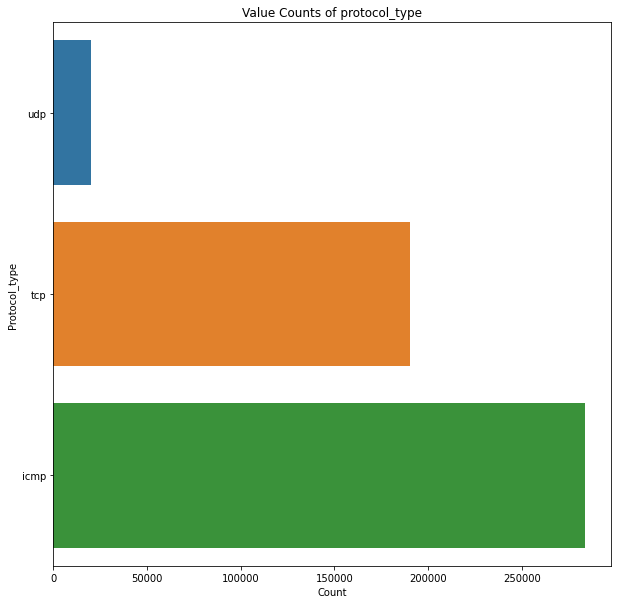

+--------+-----+
| service|count|
+--------+-----+
|  telnet|  513|
|     ftp|  798|
|    auth|  328|
|iso_tsap|  115|
|  systat|  115|
|    name|   98|
| sql_net|  110|
|   ntp_u|  380|
|     X11|   11|
|   pop_3|  202|
|    ldap|  101|
| discard|  116|
|  tftp_u|    1|
|  Z39_50|   92|
| daytime|  103|
|domain_u| 5863|
|   login|  104|
|    smtp| 9723|
|     mtp|  107|
|  domain|  116|
+--------+-----+
only showing top 20 rows



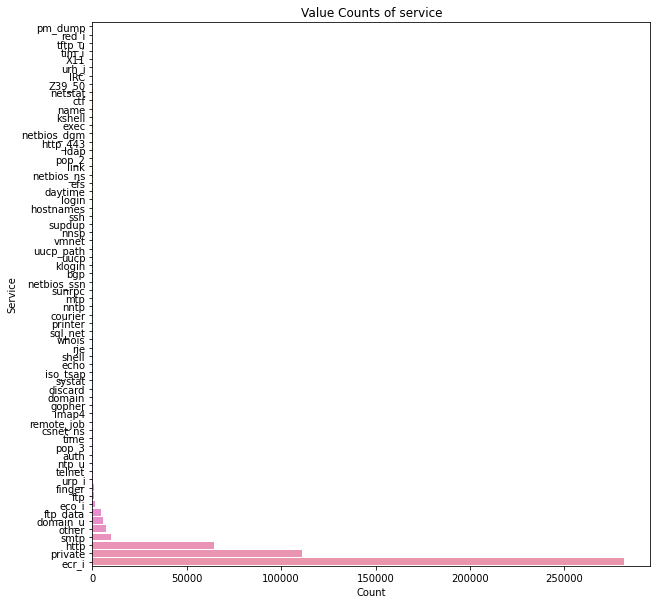

In [0]:
# Part 6
def count_connections(selected_columns_df, column):
    # Get value counts for the column:
    value_counts = selected_columns_df.groupBy(column).count()
    value_counts.show()
    return value_counts

# Part 6 (cont)
def create_bar_plot(df):
    columns = ["protocol_type", "service"]
    for column in columns:
        value_counts = count_connections(df, column)
        # Convert Spark DataFrame to Pandas DataFrame for plotting
        pandas_df = value_counts.toPandas().sort_values(by='count', ascending=True)
        # Creating the bar plot
        plt.figure(figsize=(10, 10))  # Adjust the figure size as necessary
        sns.barplot(x='count', y=column, data=pandas_df)
        
        plt.title(f'Value Counts of {column}')
        plt.xlabel('Count')
        plt.ylabel(column.capitalize())
        
        plt.show()

create_bar_plot(df_selected)

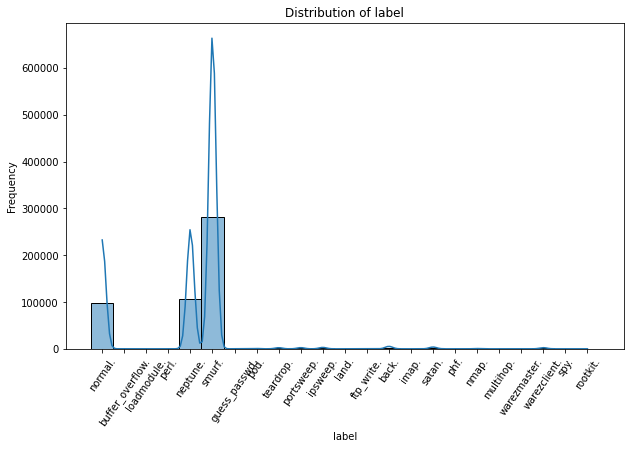

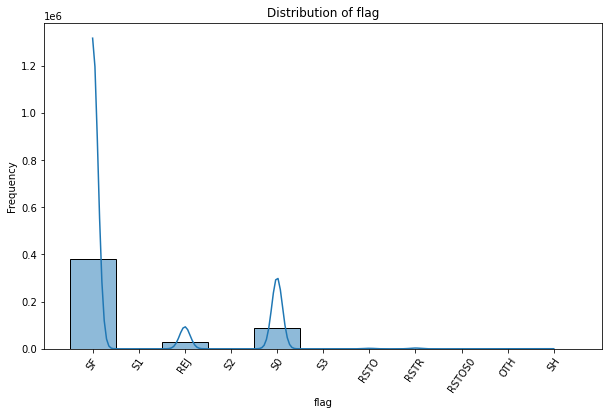

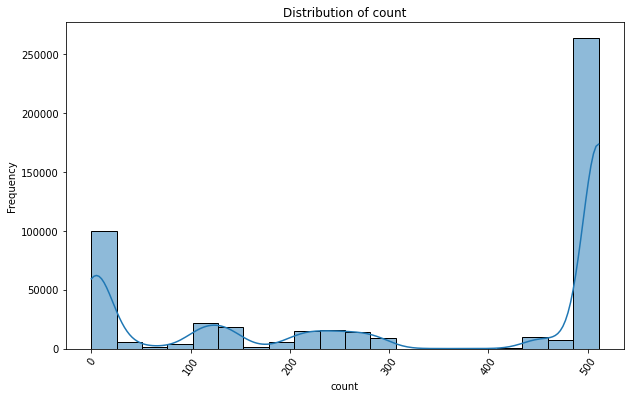

In [0]:
def exploratory_analysis(df):
    # Find the unique label values:
    # labels_unique = df.toPandas()["label"].unique()
    # print(labels_unique)
    # # Take only entries which are not labeled as normal
    # df_corrected_label = df.filter(df.label != 'normal.')
    # print("Filtering normal labels.")
    # labels_unique = df_corrected_label.toPandas()["label"].unique()

    # Create histograms for src and dst bytes, because they seemed like one of the few non-zero columns.
    columns = ["label", "flag", "count"]

    # hot = df.select("hot").toPandas()["hot"]
    # num_failed_logins = df.select("num_failed_logins").toPandas()["num_failed_logins"]

    for column in columns:
        # Convert the specific column of the Spark DataFrame to a Pandas Series
        pandas_series = df.select(column).toPandas()[column]
        # pandas_series = df_corrected_label.select(column).toPandas()[column]
        # Creating the histogram
        plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
        sns.histplot(pandas_series, kde=True, bins=20)  # kde is for the Kernel Density Estimate
        
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Rotate x-axis labels
        plt.xticks(rotation=55)
        
        plt.show()
        

exploratory_analysis(df)

Accuracy: 0.99548218666341
AUC: 0.9956129635056814


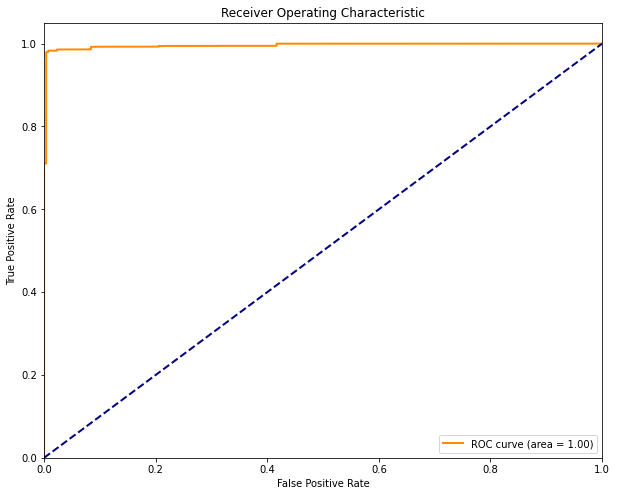

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import when, col
from sklearn.metrics import roc_curve, auc
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Part 8
def train_logistic_model(df, maxIter=10, regParam = 0.1):
    # Convert labels: 'normal' to 0, and any other value to 1
    df = df.withColumn("label", when(col("label") == "normal.", 0).otherwise(1))
    
    # Index categorical columns
    for column in ['protocol_type', 'service', 'flag']:
        indexer = StringIndexer(inputCol=column, outputCol=column+"_index")
        df = indexer.fit(df).transform(df)

    # One-hot encode indexed columns
    for column in ['protocol_type_index', 'service_index', 'flag_index']:
        encoder = OneHotEncoder(inputCol=column, outputCol=column+"_encoded")
        m = encoder.fit(df)
        # m.setOutputCols(["output"])
        df = m.transform(df)

    # Encode categorical values:
    numeric_cols = [col_name for col_name in df.columns if col_name not in ['protocol_type', 'service', 'flag', 'label', 'protocol_type_index', 'service_index', 'flag_index', 'protocol_type_index_encoded', 'service_index_encoded', 'flag_index_encoded']]
    assembler_inputs = ['protocol_type_index_encoded', 'service_index_encoded', 'flag_index_encoded'] + numeric_cols

    # Assemble into single vector
    assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
    df = assembler.transform(df) # Transform dataset

    # Split the data into training and testing sets
    train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

    # Initialize Logistic Regression model (unchanged)
    lr = LogisticRegression(featuresCol='features', labelCol='label', maxIter=maxIter, regParam=regParam)
    model = lr.fit(train_data)

    # Get test set predictions
    predictions = model.transform(test_data)
    
    # Get accuracy:
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label")
    accuracy = evaluator.evaluate(predictions)
    print(f"Accuracy: {accuracy}")

    # Extract probabilities of the positive class
    probabilities = predictions.select("probability").rdd.map(lambda row: row[0][1]).collect()
    true_labels = predictions.select("label").rdd.map(lambda row: row[0]).collect()
    # get false and true positive rates aswell as auc
    fpr, tpr, thresholds = roc_curve(true_labels, probabilities)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc}")

    # Create Figure
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Evaluate the model on AUC
    # evaluator_AUC = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
    # auc = evaluator_AUC.evaluate(predictions)
    # print(f"AUC: {auc}")
    return model

lrModel = train_logistic_model(df_selected)